In [36]:
# using Pkg
# Pkg.activate("..")
# Pkg.instantiate()
# Pkg.update()

In [37]:
using Cropbox
using Test
# using Plots
using TimeZones
using DataFramesMeta
using CSV

# Cropbox.Interact.WebIO.setup(:ijulia)

In [38]:
include("../src/Garttuce.jl")

using Dates

┌ Warning: duplicate variable
│   system = Mass
│   name = living_total_mass
│   alias = nothing => nothing
│   state = :Track => :Track
└ @ Cropbox /Users/cariso27001/.julia/packages/Cropbox/aE8bI/src/macro.jl:690


In [39]:
Lettuce = @config (
# # CV PHYL ILN GLN LL LER SG SD LTAR LTARa LIR Topt Tceil critPPD
# KM1 134 4 10 65.0 4.70 1.84 122 0 0.4421 0.1003 22.28 34.23 12 0.780714, 0.542167
    :Phenology => (
        emergence_optimal_temperature = 15.0,
        # emergence_ceiling_temperature = 28.0,
        emergence_ceiling_temperature = 30.0,
        # optimal_temperature = 15, # Topt 2nd
        optimal_temperature = 30,
        # ceiling_temperature = 28, # Tceil
        # ceiling_temperature = 35, # Tceil 2nd
        ceiling_temperature = 40,
        critical_photoperiod = 24, # critPPD
        # maximum_leaf_initiation_rate = 0.943214, 1st
        # maximum_leaf_initiation_rate = 1.28438, 2nd
        maximum_leaf_initiation_rate = 0.8,
        # maximum_leaf_initiation_rate = 0.979699,
        # maximum_emergence_rate = 0.02,
        # maximum_phyllochron_asymptote = 0.802838, 1st
        # maximum_phyllochron_asymptote = 0.56799, 2nd
        maximum_phyllochron_asymptote = 0.7,
        # maximum_phyllochron_asymptote = 0.603197,
        leaves_generic = 100, # GLN 2nd
        # leaves_generic = 10, # GLN
        # leaves_generic = 30, # GLN 1st
    ),
    :Leaf => (
        # maximum_elongation_rate = 4.7,
        maximum_elongation_rate = 4.7,
        minimum_length_of_longest_leaf = 20, # LL 2nd
        # minimum_length_of_longest_leaf = 15.0, # LL 1st
        stay_green = 3,
        # length_to_width_ratio = 0.8, # 1st
        length_to_width_ratio = 0.3 # 2nd
    ),
    :Carbon => (
# # Rm Yg
# 0.012 0.8
        #maintenance_respiration_coefficient = 0.012, # Rm
        maintenance_respiration_coefficient = 0.039, # Rm (Carbon use efficiency depends on growth respiration, maintenance respiration, and relative growth rate. A case study with lettuce)
        #synthesis_efficiency = 0.8, # Yg
        synthesis_efficiency = 0.7, # Yg
        partitioning_table = [
        # root leaf stem
          0.00 0.00 0.00 ; # seed garlic before germination
          0.15 0.60 0.25 ; # vegetative stage
          0.00 0.00 0.00 ; # dead
        ],
    ),
);

In [40]:
ConstructA = @config(Lettuce, (
    :Phenology => (
        planting_date = ZonedDateTime(2021, 10, 12, tz"Asia/Taipei"),
        emergence_date = ZonedDateTime(2021, 10, 24, tz"Asia/Taipei"),
    ),
    :Meta => (
        planting_group = 1,
        year = 2021,
    ),
    :Calendar => (
        init = ZonedDateTime(2021, 10, 12, 18, tz"Asia/Taipei"),
        last = ZonedDateTime(2021, 12, 19, tz"Asia/Taipei"),
    ),
    :Weather => (
        CO2 = 390,
        store = Garttuce.loadwea("$(@__DIR__)/../data/winter2021.wea", tz"Asia/Taipei"),
    ),
    :Plant => (initial_planting_density = 55,),
));

In [41]:
ConstructB = @config(Lettuce, (
    :Phenology => (
        planting_date = ZonedDateTime(2022, 3, 7, tz"Asia/Taipei"),
        emergence_date = ZonedDateTime(2022, 4, 10, tz"Asia/Taipei"),
    ),
    :Meta => (
        planting_group = 1,
        year = 2022,
    ),
    :Calendar => (
        init = ZonedDateTime(2022, 3, 7, 23, tz"Asia/Taipei"),
        last = ZonedDateTime(2022, 5, 28, tz"Asia/Taipei"),
    ),
    :Weather => (
        CO2 = 390,
        store = Garttuce.loadwea("$(@__DIR__)/../data/spring2022.wea", tz"Asia/Taipei"),
    ),
    :Plant => (initial_planting_density = 55,),
));

In [42]:
# obs_leafnum = CSV.read("$(@__DIR__)/../data/OBS_Winter2021/winter2021_leafnum_consistent.csv", DataFrame) |> unitfy

# f(s) = s.DAP' in obs_leafnum.DAP && Dates.hour(s.calendar.time') == 12

# # r = simulate(Garlic.Model;
# calibrate(Garttuce.Model, obs_leafnum;
#     config=ConstructA,
#     parameters= :Phenology => (;
#         LTARa_max = (0.1,1.5),
#         LIR_max = (0.2,1.5),
#     ),
#     stop="calendar.count",
#     index=:DAP,
#     target=:Appeared_mean => :leaves_appeared,
#     snap=f,
#     optim=(:MaxSteps => 50,),
# )

In [43]:
# obs_leafnum = CSV.read("$(@__DIR__)/../data/OBS_Spring2022/spring2022_leafnum_consistent.csv", DataFrame) |> unitfy

# f(s) = s.DAP' in obs_leafnum.DAP && Dates.hour(s.calendar.time') == 12

# # r = simulate(Garlic.Model;
# calibrate(Garttuce.Model, obs_leafnum;
#     config=ConstructB,
#     parameters= :Phenology => (;
#         LTARa_max = (0.1,1.5),
#         LIR_max = (0.2,1.5),
#     ),
#     stop="calendar.count",
#     index=:DAP,
#     target=:new_leaf => :leaves_appeared,
#     snap=f,
#     optim=(:MaxSteps => 50,),
# )

Progress: 100%[===========================] Time: 0:00:02 ( 1.86 ms/it)


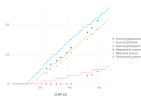

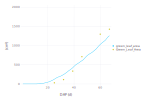

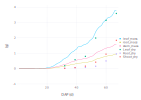

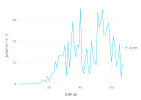

In [44]:
obs_drymass = CSV.read("$(@__DIR__)/../data/OBS_Winter2021/winter2021_DryMass.csv", DataFrame) |> unitfy
obs_area = CSV.read("$(@__DIR__)/../data/OBS_Winter2021/winter2021_Area.csv", DataFrame) |> unitfy
obs_leafnum = CSV.read("$(@__DIR__)/../data/OBS_Winter2021/winter2021_leafnum_consistent.csv", DataFrame) |> unitfy

r = simulate(Garttuce.Model;
    config=ConstructA,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
)
@test r.leaves_initiated[end] > 0

sln = visualize(r, :DAP, [:leaves_appeared, :leaves_mature, :leaves_dropped], kind=:line) # Fig. Leaf Number
visualize!(sln, obs_leafnum, :DAP, [:Appeared_mean, :Matured_mean, :Senesced_mean]) |> display # Fig. Leaf Area
sa = visualize(r, :DAP, :green_leaf_area, kind=:line, ylim = (0,2000))
visualize!(sa, obs_area, :DAP, [:Green_Leaf_Area]) |> display # Fig. Leaf Area
sb = visualize(r, :DAP, [:leaf_mass, :root_mass, :stem_mass], kind=:line)
visualize!(sb, obs_drymass, :DAP, [:Leaf_dry, :Root_dry, :Shoot_dry]) |> display # Fig. Biomass
visualize(r, :DAP, [:A_net], kind=:line) |> display

In [45]:
evaluate(obs_leafnum, r; index = :DAP, target = :Appeared_mean => :leaves_appeared, metric=:ef) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Appeared_mean => :leaves_appeared, metric=:rmse) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Matured_mean => :leaves_mature, metric=:ef) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Matured_mean => :leaves_mature, metric=:rmse) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_mean => :leaves_dropped, metric=:ef) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_mean => :leaves_dropped, metric=:rmse) |> display

evaluate(obs_area, r; index = :DAP, target = :Green_Leaf_Area => :green_leaf_area, metric=:ef) |> display
evaluate(obs_area, r; index = :DAP, target = :Green_Leaf_Area => :green_leaf_area, metric=:rmse) |> display

evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:ef) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:rmse) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Shoot_dry => :stem_mass, metric=:ef) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Shoot_dry => :stem_mass, metric=:rmse) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:ef) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:rmse) |> display

0.7821008192518736

2.4216620504937154

0.9655067187187608

0.9306796542527428

-0.6106569560047554

1.6921554727649746

0.8547681388412213

155.3786397316834 cm²

0.8012734579712733

0.4859757214878397 g

0.1415172195078941

0.4208634276729053 g

-0.0481511007306239

0.2790220925667785 g

In [46]:
CSV.write("$(@__DIR__)/../output/SimExportA-1(AfterCal).csv", r)

"/Users/cariso27001/CropModeling/Garttuce/test/../output/SimExportA-1(AfterCal).csv"

Progress: 100%[===========================] Time: 0:00:02 ( 1.28 ms/it)


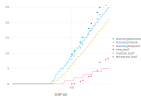

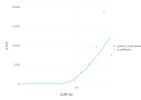

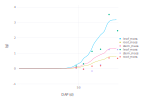

In [47]:
obs_leafnum = CSV.read("$(@__DIR__)/../data/OBS_Spring2022/spring2022_leafnum_consistent.csv", DataFrame) |> unitfy
obs_drymass = CSV.read("$(@__DIR__)/../data/OBS_Spring2022/spring2022_DryMass.csv", DataFrame) |> unitfy
obs_area = CSV.read("$(@__DIR__)/../data/OBS_Spring2022/spring2022_Area.csv", DataFrame) |> unitfy

r = simulate(Garttuce.Model;
    config=ConstructB,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
)
@test r.leaves_initiated[end] > 0

sln = visualize(r, :DAP, [:leaves_appeared, :leaves_mature, :leaves_dropped], kind=:line) # Fig. Leaf Number
visualize!(sln, obs_leafnum, :DAP, [:new_leaf, :mature_leaf, :senesced_leaf]) |> display # Fig. Leaf Area
sa = visualize(r, :DAP, :green_leaf_area, kind=:line, ylim = (0,2000))
visualize!(sa, obs_area, :DAP, [:LeafArea]) |> display # Fig. Leaf Area
sb = visualize(r, :DAP, [:leaf_mass, :root_mass, :stem_mass], kind=:line)
visualize!(sb, obs_drymass, :DAP, [:leaf_mass, :stem_mass, :root_mass]) |> display # Fig. Biomass

In [48]:
evaluate(obs_leafnum, r; index = :DAP, target = :new_leaf => :leaves_appeared, metric=:ef) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :new_leaf => :leaves_appeared, metric=:rmse) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :mature_leaf => :leaves_mature, metric=:ef) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :mature_leaf => :leaves_mature, metric=:rmse) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :senesced_leaf => :leaves_dropped, metric=:ef) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :senesced_leaf => :leaves_dropped, metric=:rmse) |> display

evaluate(obs_area, r; index = :DAP, target = :LeafArea => :green_leaf_area, metric=:ef) |> display
evaluate(obs_area, r; index = :DAP, target = :LeafArea => :green_leaf_area, metric=:rmse) |> display

evaluate(obs_drymass, r; index = :DAP, target = :leaf_mass => :leaf_mass, metric=:ef) |> display
evaluate(obs_drymass, r; index = :DAP, target = :leaf_mass => :leaf_mass, metric=:rmse) |> display
evaluate(obs_drymass, r; index = :DAP, target = :stem_mass => :stem_mass, metric=:ef) |> display
evaluate(obs_drymass, r; index = :DAP, target = :stem_mass => :stem_mass, metric=:rmse) |> display
evaluate(obs_drymass, r; index = :DAP, target = :root_mass => :root_mass, metric=:ef) |> display
evaluate(obs_drymass, r; index = :DAP, target = :root_mass => :root_mass, metric=:rmse) |> display

0.7623012802087249

2.5655170143696977

0.3337084289580402

4.065795602037936

-1.095060982973071

1.8816623132816608

-0.9710389626552995

424.7619645235851 cm²

0.7562178886049925

0.5028233542614177 g

-0.1965126323522668

0.4641538168342501 g

0.35674367237418614

0.20419568756771475 g

In [49]:
CSV.write("$(@__DIR__)/../output/SimExportA-2(AfterCal).csv", r)

"/Users/cariso27001/CropModeling/Garttuce/test/../output/SimExportA-2(AfterCal).csv"

In [50]:
# Cropbox.Unitful.ustrip.(r.leaves_initiated)

In [51]:
# Cropbox.Interact.WebIO.setup(:ijulia)

# manipulate(Garttuce.Model, :DAP, [:leaves_appeared, :leaves_mature, :leaves_dropped];
#     config = ConstructB,
#     parameters = :Phenology => (;
#         optimal_temperature = 10:40,
        
#     )
#     stop = "calendar.count",
#     kind = :line,
# )

In [52]:

# # Additional figure generation block

# using Plots

# LeafN = Plots.plot(r.DAP, r.leaves_appeared,
#     ylabel = "Leaf number", 
#     xlabel = "Day after planting",
#     label  = "Sim. leaves appeared", color = "red", xlim=[0,85], grid = false)
# LeafN = Plots.plot!(LeafN, r.DAP, r.leaves_mature, label="Sim. leaves matured", color = "green")
# LeafN = Plots.plot!(LeafN, r.DAP, r.leaves_dropped, label="Sim. leaves dropped", color = "skyblue3")
# LeafN = Plots.plot!(LeafN, obs_leafnum.DAP, obs_leafnum.new_leaf, label="Obs. leaves appeared", line = :scatter, color = "red")
# LeafN = Plots.plot!(LeafN, obs_leafnum.DAP, obs_leafnum.mature_leaf, label="Obs. leaves matured", line = :scatter, color = "green")
# LeafN = Plots.plot!(LeafN, obs_leafnum.DAP, obs_leafnum.senesced_leaf, label="Obs. leaves dropped", line = :scatter, color = "skyblue3") |> display
# savefig("../Spring2022_LeafNum.svg")


# LeafA = Plots.plot(r.DAP, r.green_leaf_area,
#     ylabel = "Green leaf area", 
#     xlabel = "Day after planting",
#     label  = "Simulated", xlim=[0,85], grid = false)
# LeafA = Plots.plot!(LeafA, obs_area.DAP, obs_area.LeafArea, label="Obs. value", line = :scatter) |> display
# savefig("../Spring2022_LeafArea.svg")

# PlantB = Plots.plot(r.DAP, r.leaf_mass,
#     ylabel = "Drymass", 
#     xlabel = "Day after planting",
#     label  = "Sim. leaf mass", color = "red", xlim=[0,85], grid = false)
# PlantB = Plots.plot!(PlantB, r.DAP, r.stem_mass, label="Sim. stem mass", color = "green")
# PlantB = Plots.plot!(PlantB, r.DAP, r.root_mass, label="Sim. root mass", color = "skyblue3")
# PlantB = Plots.plot!(PlantB, obs_drymass.DAP, obs_drymass.leaf_mass, label="Obs. leaf mass", line = :scatter, color = "red")
# PlantB = Plots.plot!(PlantB, obs_drymass.DAP, obs_drymass.stem_mass, label="Obs. stem mass", line = :scatter, color = "green")
# PlantB = Plots.plot!(PlantB, obs_drymass.DAP, obs_drymass.root_mass, label="Obs. root mass", line = :scatter, color = "skyblue3") |> display
# savefig("../Spring2022_Drymass.svg")